In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A28E2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]


In [2]:
df=pd.read_csv('shopping_trends_updated.csv')


In [3]:
df.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
964,965,42,Male,Sandals,Footwear,51,Arizona,M,Beige,Spring,2.6,Yes,Next Day Air,Yes,Yes,12,Venmo,Bi-Weekly
2984,2985,45,Female,Gloves,Accessories,32,Texas,L,Red,Spring,4.3,No,2-Day Shipping,No,No,36,Debit Card,Bi-Weekly
2129,2130,40,Male,Skirt,Clothing,57,Minnesota,L,Orange,Fall,2.8,No,Store Pickup,No,No,12,PayPal,Every 3 Months
3801,3802,26,Female,Blouse,Clothing,84,Kentucky,M,Peach,Spring,5.0,No,Store Pickup,No,No,36,PayPal,Fortnightly
3694,3695,45,Female,Sweater,Clothing,41,Rhode Island,M,Blue,Winter,2.6,No,Express,No,No,11,PayPal,Bi-Weekly


In [4]:
df.shape

(3900, 18)

In [5]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [7]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [8]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

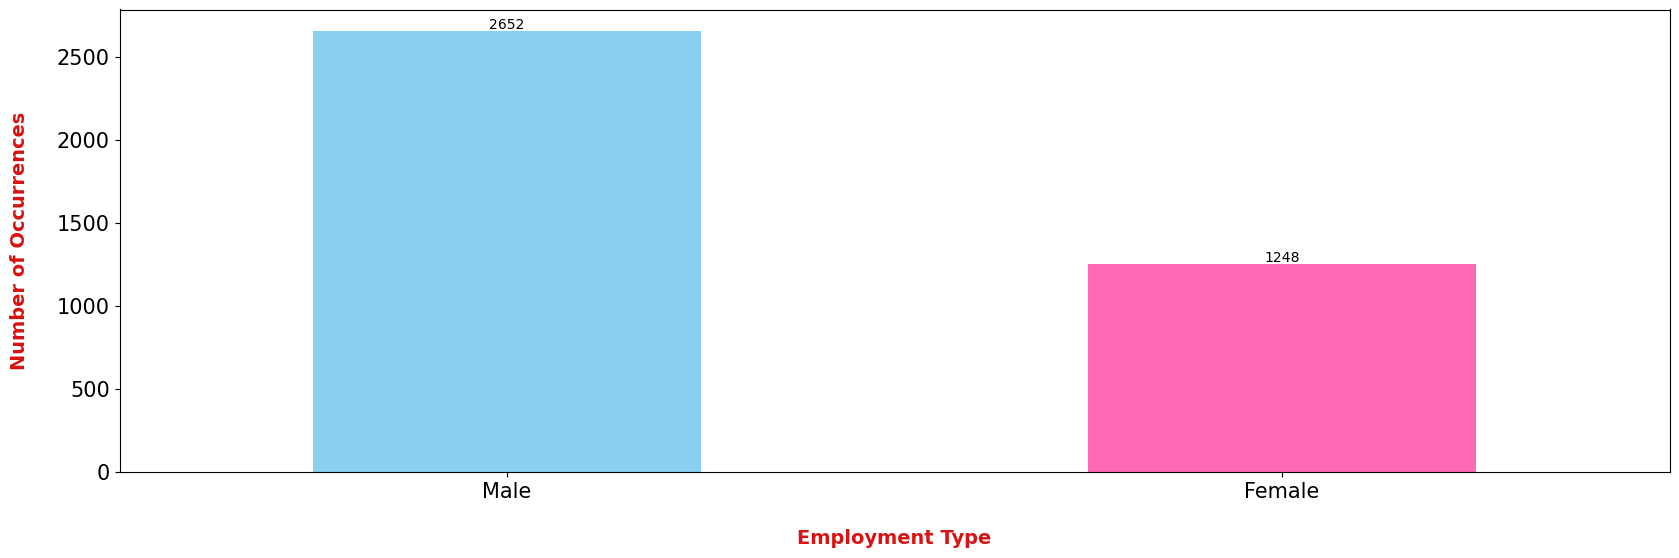

In [10]:
plt.figure(figsize = (20, 6))
ax = df["Gender"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Male', 'Female'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')

ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Employment Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

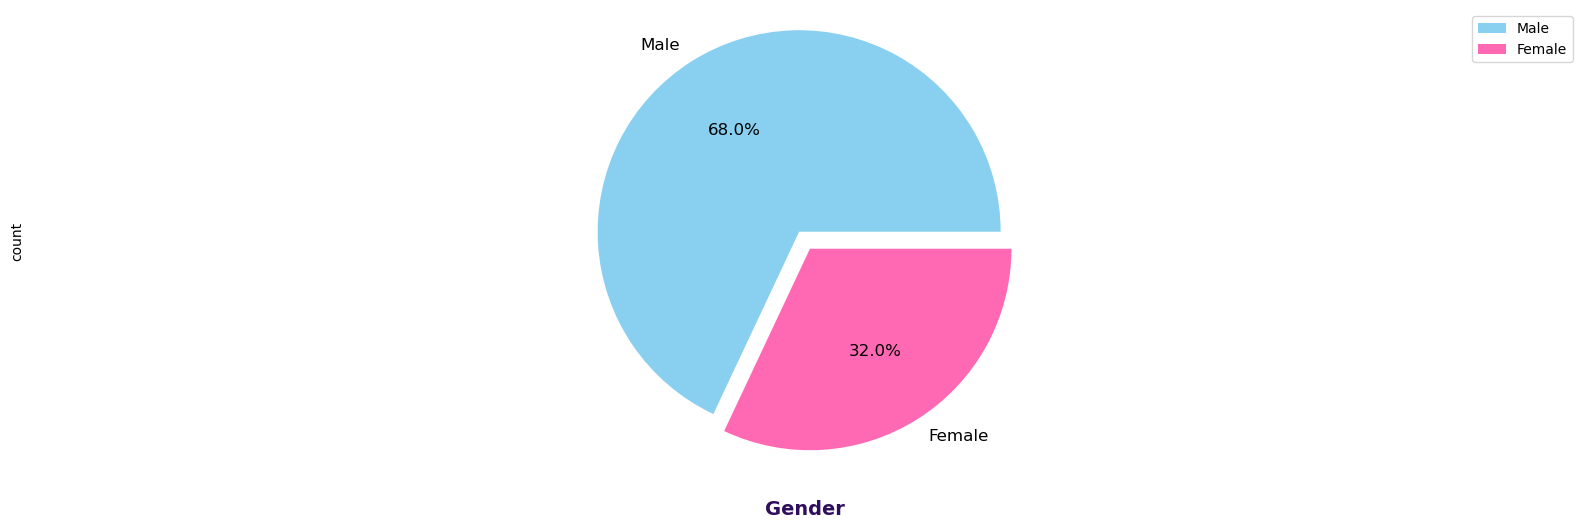

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
counts = df["Gender"].value_counts()
explode = (0, 0.1)
counts.plot(kind='pie', fontsize=12, colors=colors, explode=explode, autopct='%1.1f%%')
plt.xlabel('Gender', weight="bold", color="#2F0F5D", fontsize=14, labelpad=20)
plt.axis('equal') 
plt.legend(labels=counts.index, loc="best")
plt.show()

In [12]:
df['Category'].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

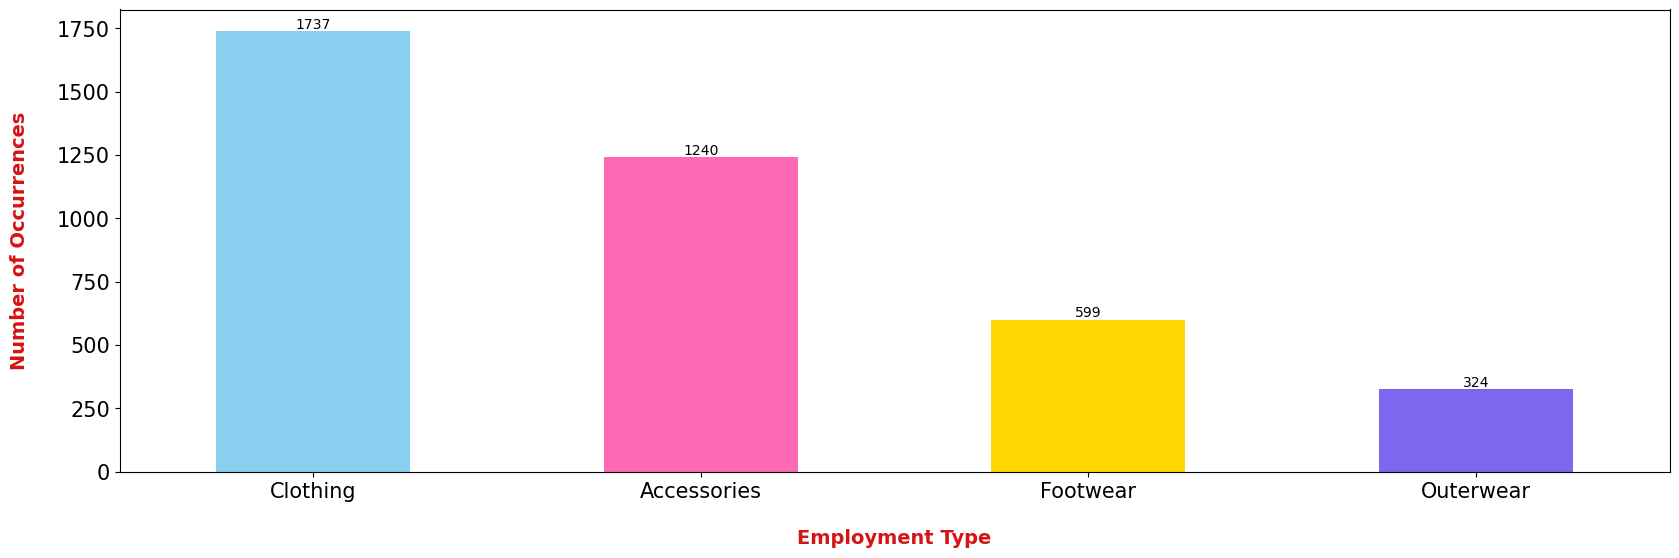

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
ax = df["Category"].value_counts().plot(kind='bar', color=colors, rot=0)

ax.set_xticklabels(('Clothing', 'Accessories', 'Footwear', 'Outerwear'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), 
                (p.get_x() + 0.25, p.get_height() + 1), 
                ha='center', va='bottom', color='black')

ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Employment Type', weight="bold", color="#D71313", fontsize=14, labelpad=20)
plt.ylabel('Number of Occurrences', weight="bold", color="#D71313", fontsize=14, labelpad=20)

plt.show()

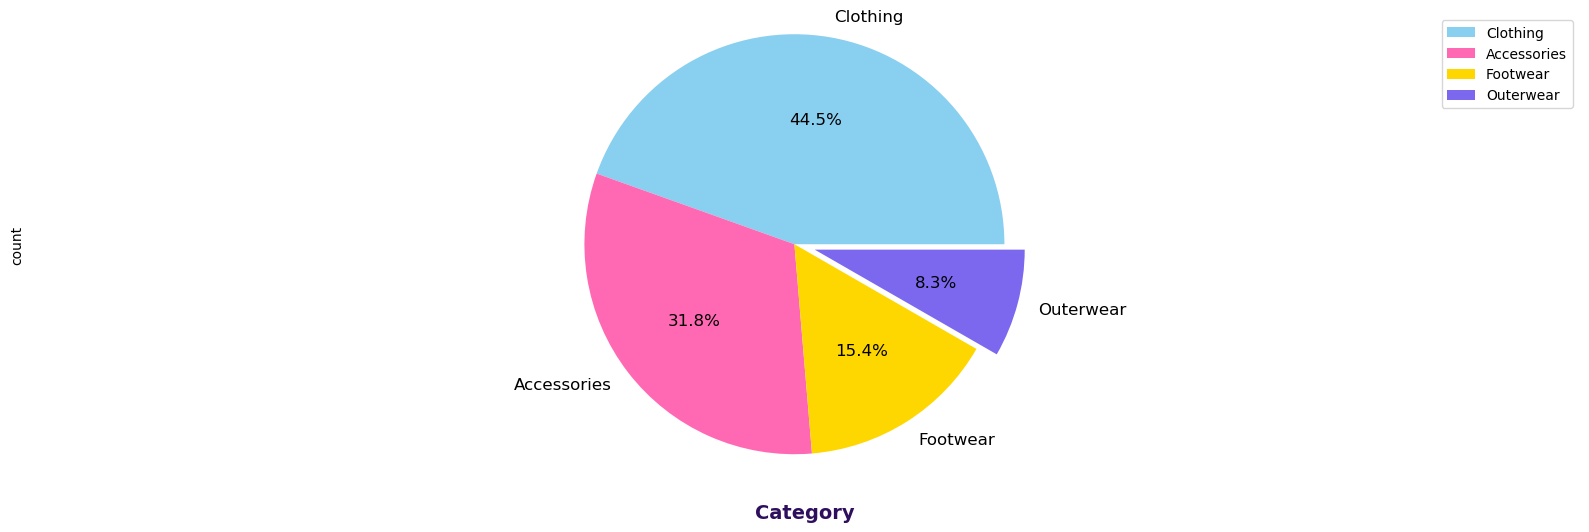

In [14]:
plt.figure(figsize=(20, 6))
counts = df["Category"].value_counts()
explode = (0, 0.0, 0.0, 0.1)
counts.plot(kind='pie', fontsize=12, colors=colors, explode=explode, autopct='%1.1f%%')
plt.xlabel('Category', weight="bold", color="#2F0F5D", fontsize=14, labelpad=20)
plt.axis('equal')
plt.legend(labels=counts.index, loc="best")
plt.show()

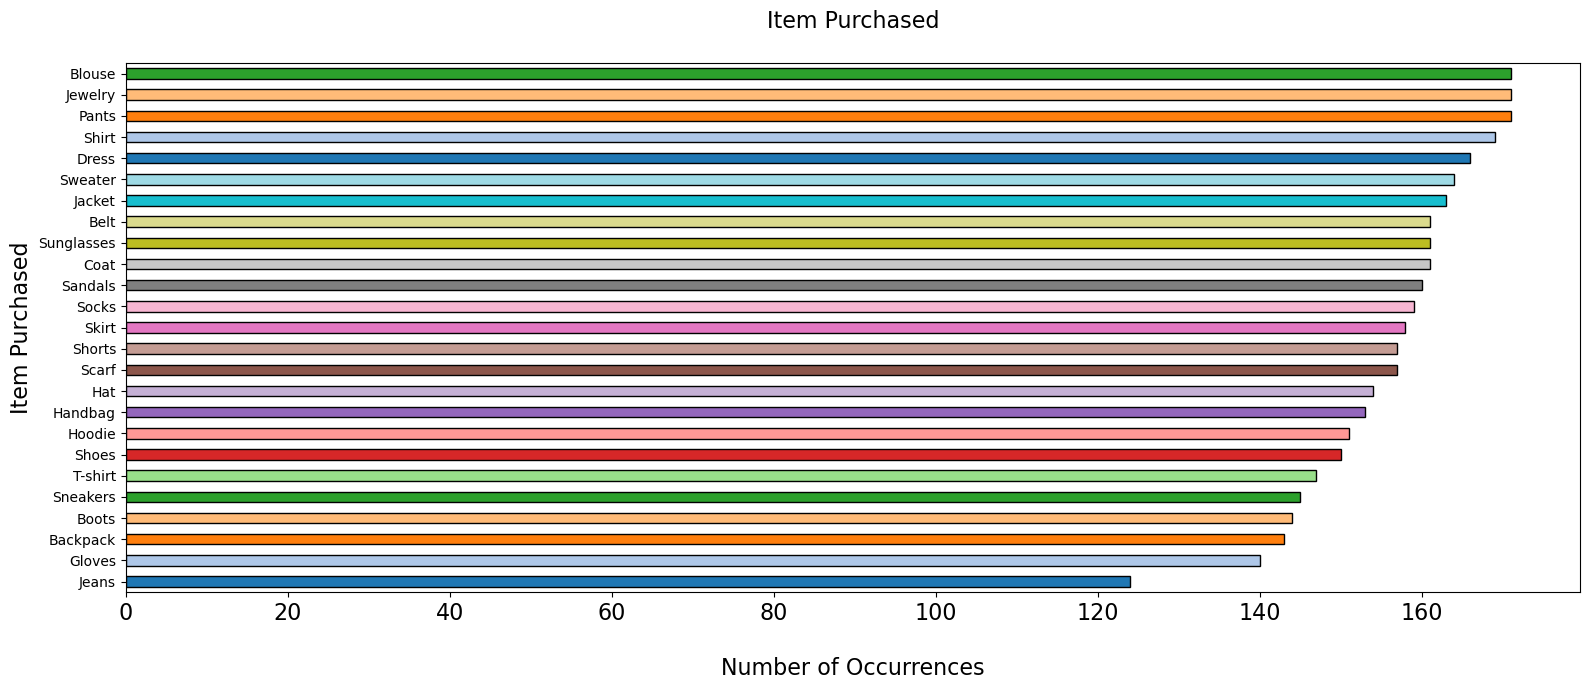

In [15]:

plt.figure(figsize=(16, 7))


df["Item Purchased"].value_counts().sort_values(ascending=True).plot( kind='barh', color=sns.color_palette('tab20'), edgecolor='black')

plt.ylabel('Item Purchased', fontsize=16)
plt.xlabel('\nNumber of Occurrences', fontsize=16)
plt.title('Item Purchased\n', fontsize=16)
plt.xticks(rotation=0, ha='center', fontsize=16)

plt.tight_layout()
plt.show()

In [16]:
df['Size'].value_counts()

Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64

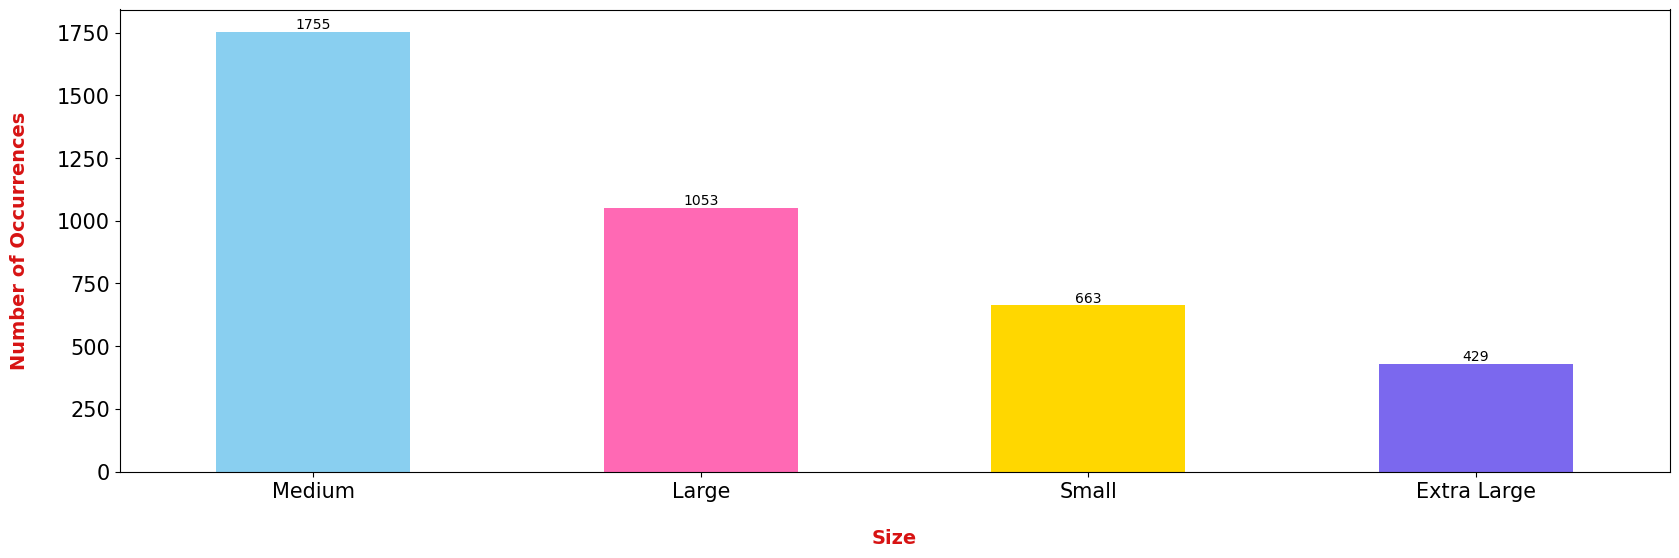

In [17]:
plt.figure(figsize=(20, 6))
ax = df["Size"].value_counts().plot(kind='bar', color=colors, rot=0)
ax.set_xticklabels(('Medium', 'Large', 'Small', 'Extra Large'))
for p in ax.patches:
    ax.annotate(int(p.get_height()), 
                (p.get_x() + 0.25, p.get_height() + 1), 
                ha='center', va='bottom', color='black')

ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Size', weight="bold", color="#D71313", fontsize=14, labelpad=20)
plt.ylabel('Number of Occurrences', weight="bold", color="#D71313", fontsize=14, labelpad=20)

plt.show()

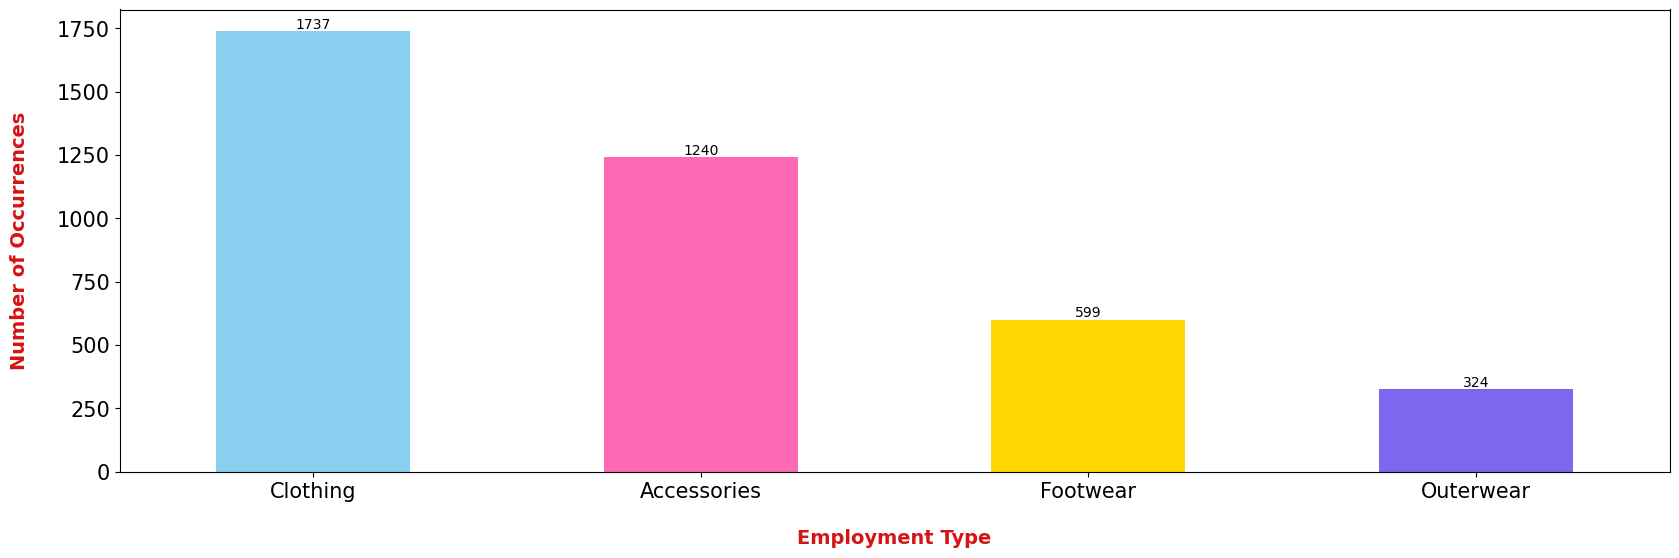

In [18]:
plt.figure(figsize=(20, 6))
ax = df["Category"].value_counts().plot(kind='bar', color=colors, rot=0)
ax.set_xticklabels(('Clothing', 'Accessories', 'Footwear', 'Outerwear'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), 
                ha='center', va='bottom', color='black')

ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Employment Type', weight="bold", color="#D71313", fontsize=14, labelpad=20)
plt.ylabel('Number of Occurrences', weight="bold", color="#D71313", fontsize=14, labelpad=20)
plt.show()

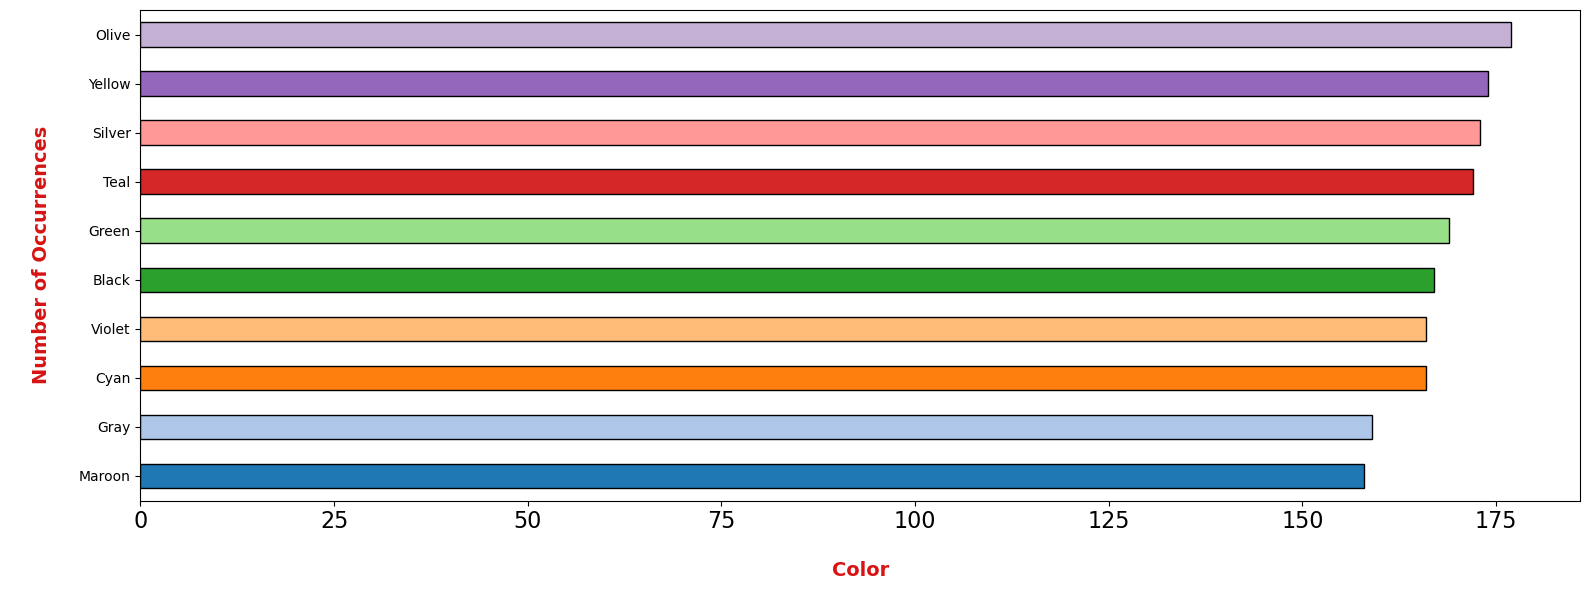

In [19]:
plt.figure(figsize = (16, 6))

df["Color"].value_counts()[:10].sort_values(ascending = True).plot(
    kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black'
)

plt.xlabel('Color', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('\nNumber of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)

plt.tight_layout()
plt.show()

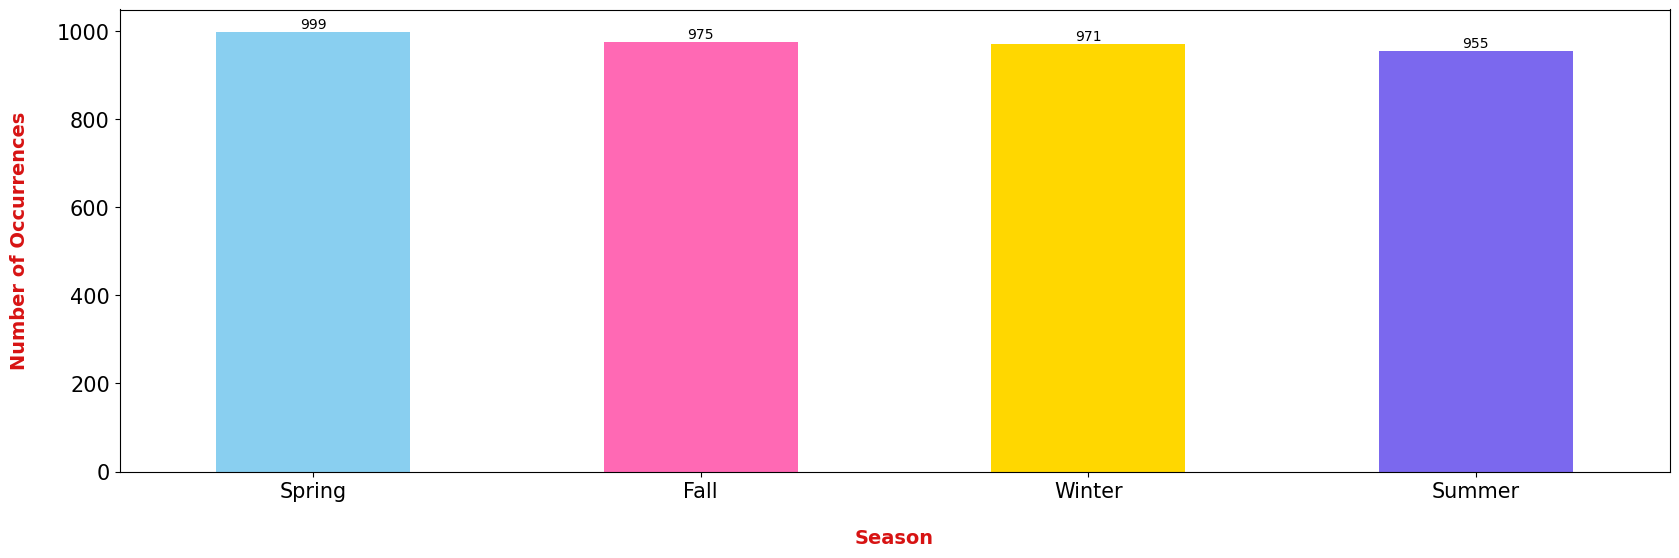

In [20]:
plt.figure(figsize = (20, 6))
ax = df["Season"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Spring', 'Fall', 'Winter', 'Summer'))
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), 
                ha = 'center', va = 'bottom', color = 'black')
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Season', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.show()

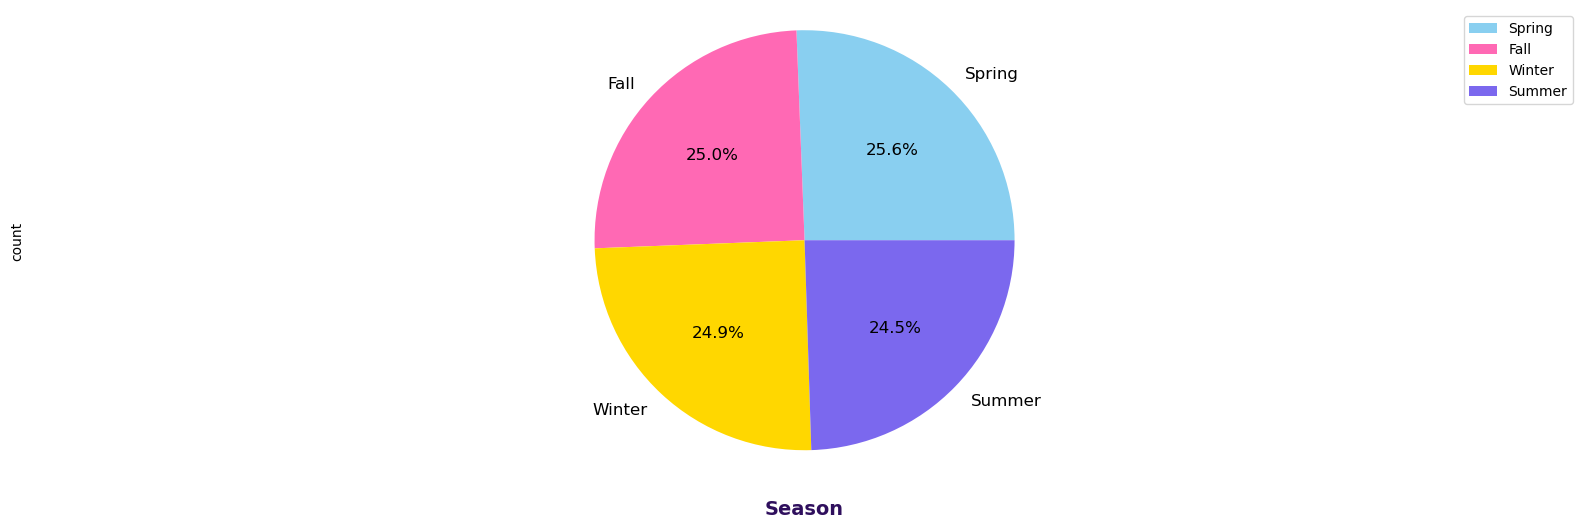

In [21]:
plt.figure(figsize = (20, 6))
counts = df["Season"].value_counts()
explode = (0, 0, 0, 0)
counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Season', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [22]:
df['Payment Method'].value_counts()

Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64

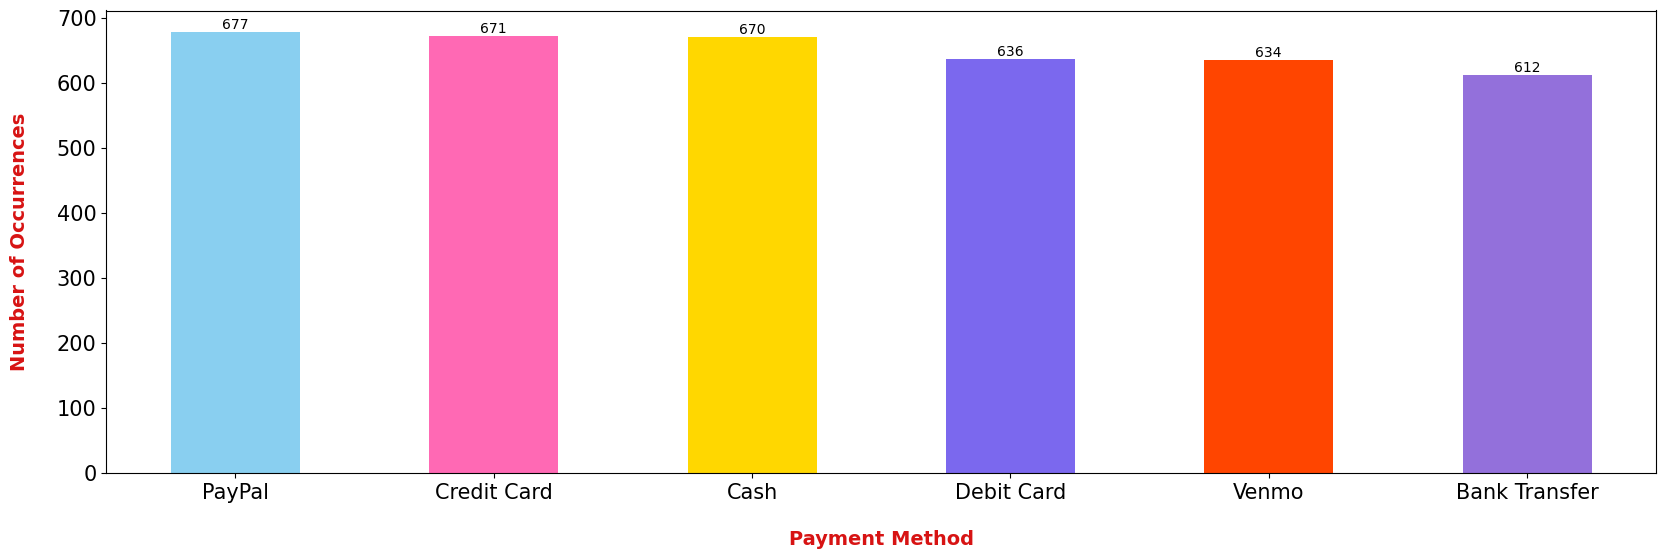

In [23]:
plt.figure(figsize = (20, 6))
ax = df["Payment Method"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('PayPal', 'Credit Card', 'Cash', 'Debit Card','Venmo','Bank Transfer'))
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), 
                ha = 'center', va = 'bottom', color = 'black')
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Payment Method', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.show()

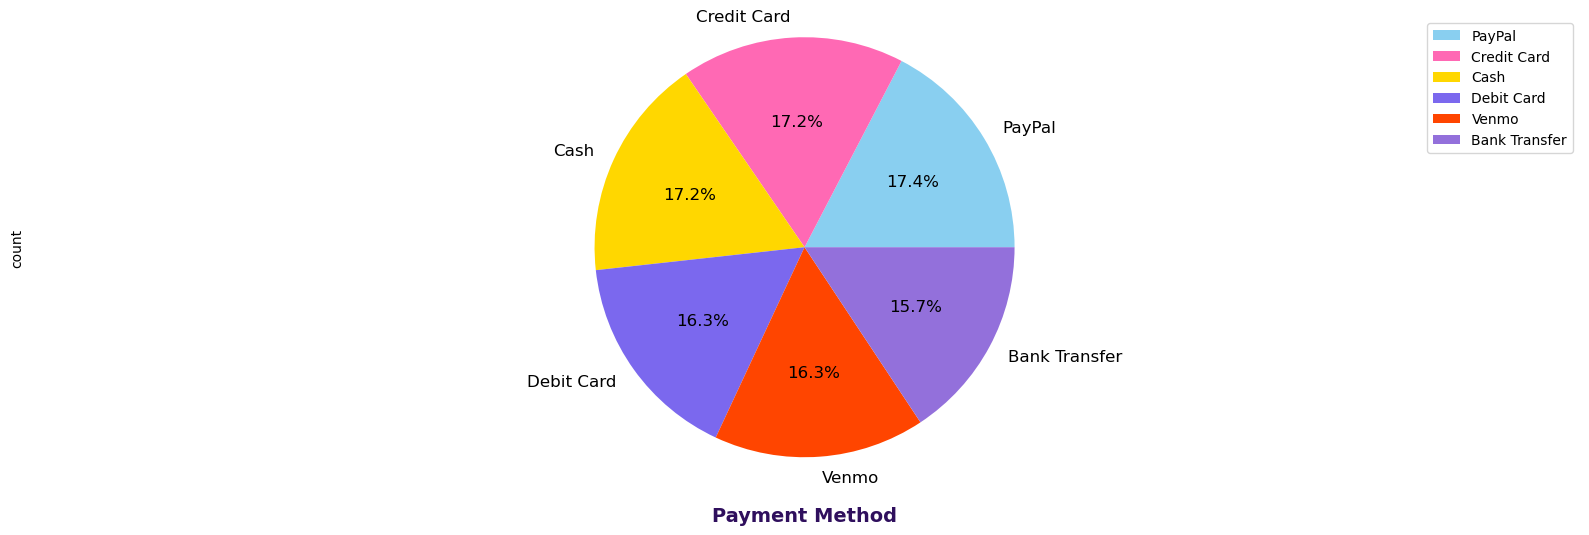

In [24]:
plt.figure(figsize = (20, 6))
counts = df["Payment Method"].value_counts()
explode = (0, 0, 0, 0,0,0)
counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Payment Method', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [25]:
df['Subscription Status'].value_counts()

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64

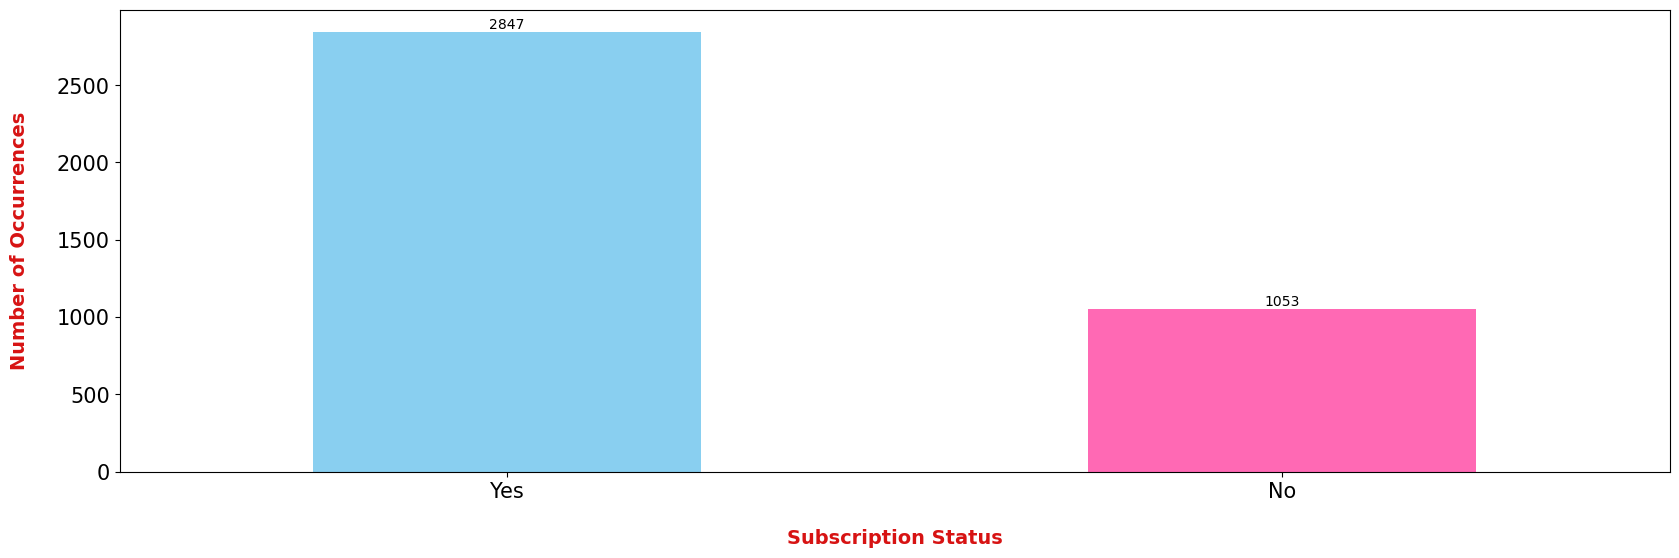

In [26]:
plt.figure(figsize = (20, 6))
ax = df["Subscription Status"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Yes', 'No'))
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), 
                ha = 'center', va = 'bottom', color = 'black')
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Subscription Status', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.show()

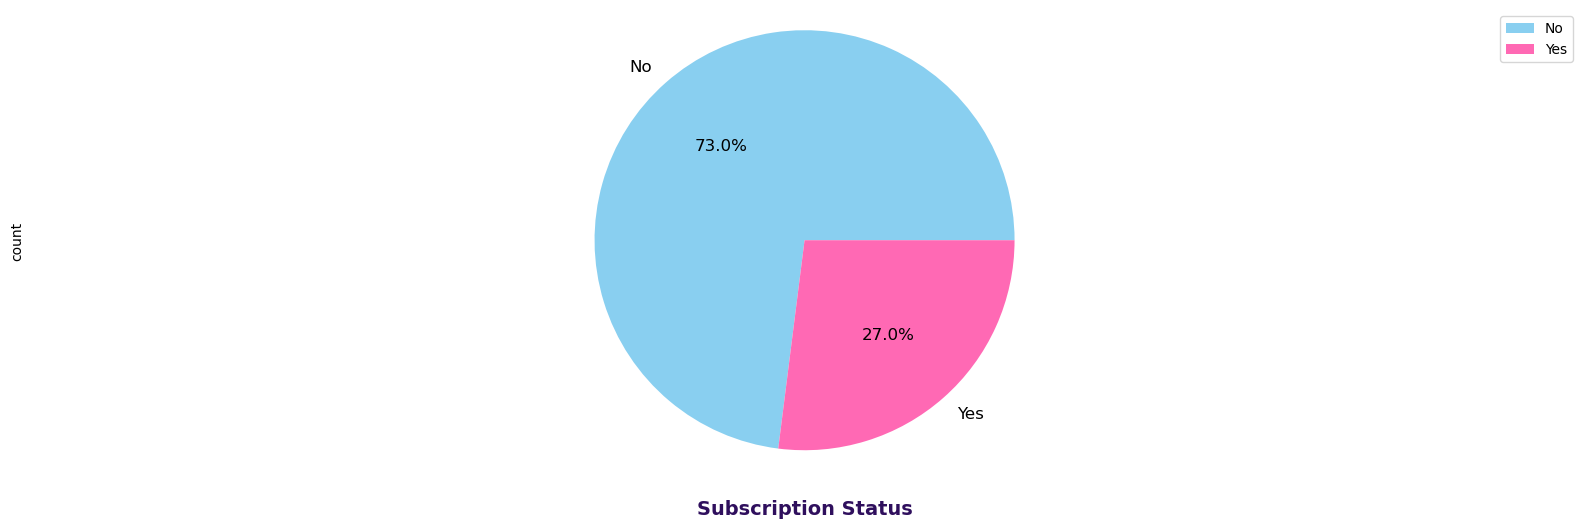

In [27]:
plt.figure(figsize = (20, 6))
counts = df["Subscription Status"].value_counts()
explode = (0, 0)
counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Subscription Status', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [28]:
df['Shipping Type'].value_counts()

Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64

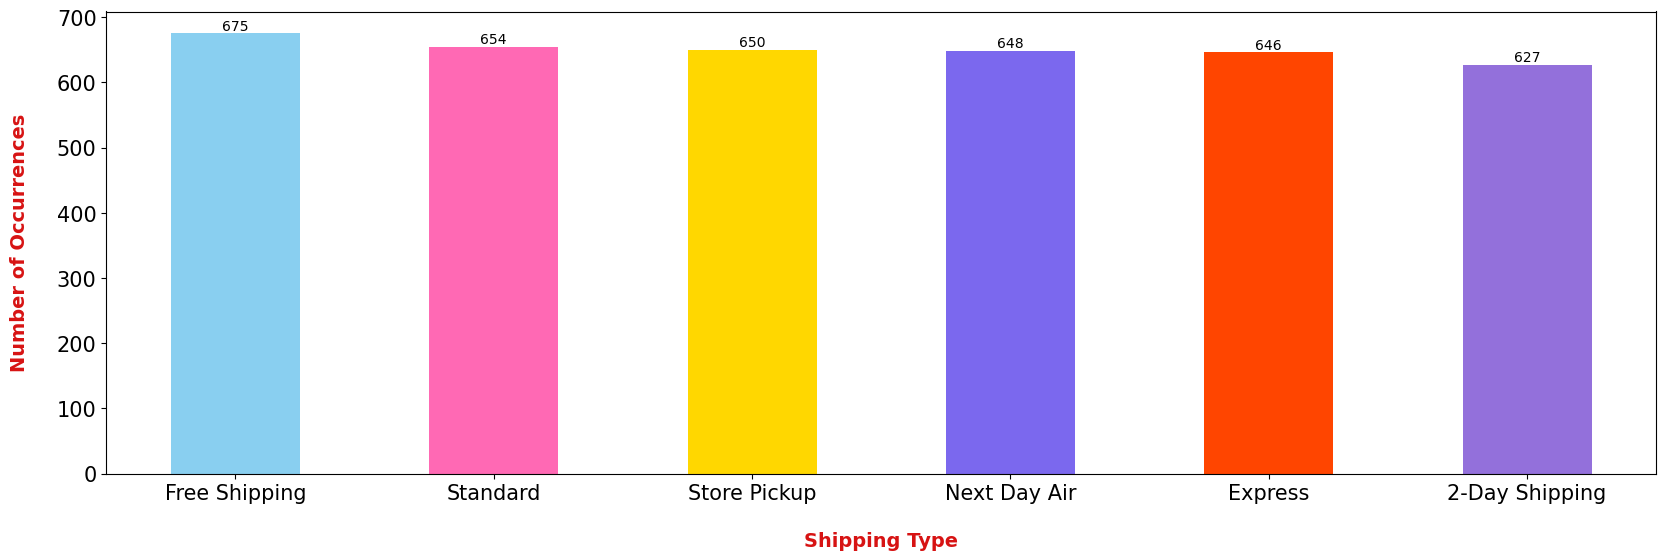

In [29]:
plt.figure(figsize = (20, 6))
ax = df["Shipping Type"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Free Shipping', 'Standard','Store Pickup','Next Day Air','Express','2-Day Shipping'))
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), 
                ha = 'center', va = 'bottom', color = 'black')
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Shipping Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.show()

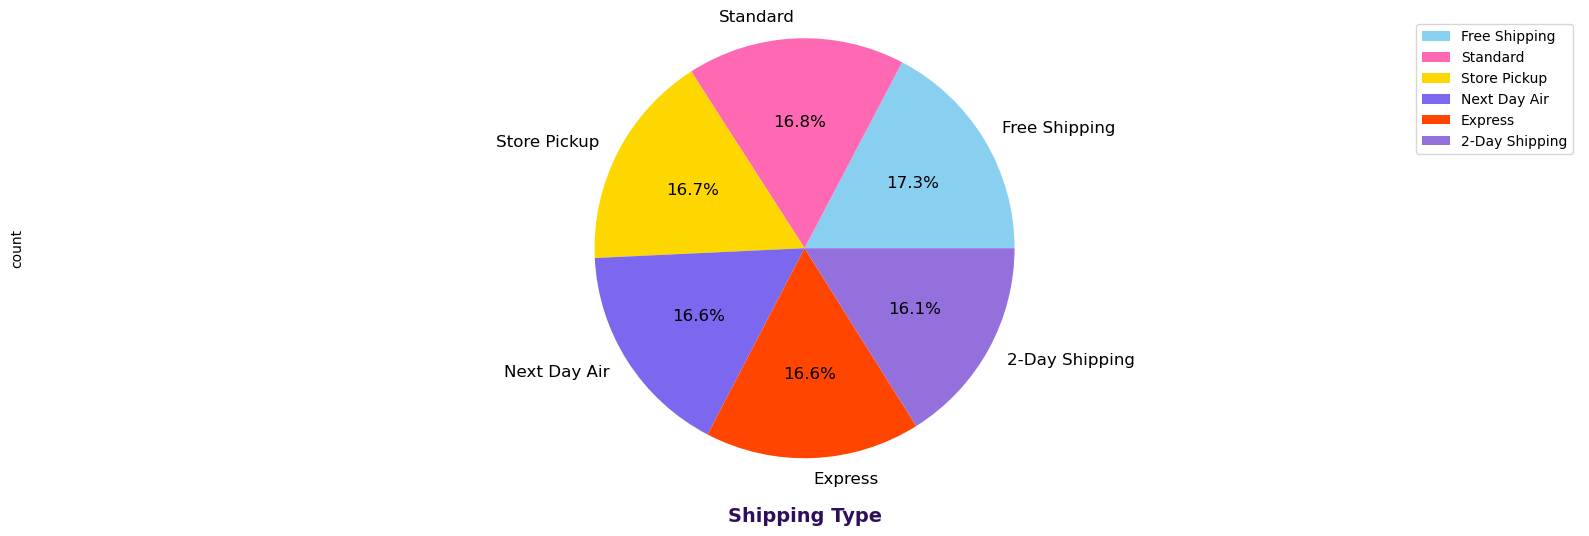

In [30]:
plt.figure(figsize = (20, 6))
counts = df["Shipping Type"].value_counts()
explode = (0, 0,0,0,0,0)
counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Shipping Type', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()